In [88]:
# import plotly
from gensim import corpora, models, similarities, matutils
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from matplotlib import pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'plotly'

In [8]:
tfidf = TfidfVectorizer(stop_words="english", 
                        token_pattern="\\b[a-zA-Z][a-zA-Z]+\\b")

In [9]:
documents = ["Human machine interface for lab abc computer applications",
             "A survey of user opinion of computer system response time",
             "The EPS user interface management system",
             "System and human system engineering testing of EPS",
             "Relation of user perceived response time to error measurement",
             "The generation of random binary unordered trees",
             "The intersection graph of paths in trees",
             "Graph minors IV Widths of trees and well quasi ordering",
             "Graph minors A survey"]

In [48]:
tfidf_vecs = tfidf.fit_transform(documents)


# tfidf_vecs.toarray()
# array([[0.40356294, 0.40356294, 0.        , 0.34085569, 0.        ,
#         0.        , 0.        , 0.        , 0.        , 0.34085569,
#         0.34085569, 0.        , 0.        , 0.40356294, 0.40356294,
#         0.        , 0.        , 0.        , 0.        , 0.        ,
#         0.        , 0.        , 0.        , 0.        , 0.        ,
#         0.        , 0.        , 0.        , 0.        , 0.        ,
#         0.        , 0.        , 0.        ],
        
#        [0.        , 0.        , 0.        , 0.40298459, 0.        ,
#         0.        , 0.        , 0.        , 0.        , 0.        ,
#         0.        , 0.        , 0.        , 0.        , 0.        ,
#         0.        , 0.        , 0.        , 0.4771217 , 0.        ,
#         0.        , 0.        , 0.        , 0.        , 0.        ,
#         0.40298459, 0.40298459, 0.        , 0.40298459, 0.        ,
#         0.        , 0.35038347, 0.        ],
#         ...


In [49]:
tfidf_corpus = matutils.Sparse2Corpus(tfidf_vecs.transpose())

In [54]:
# for i in tfidf_corpus:
#     print(i)
# [(9, 0.34085568775433567), (14, 0.40356294440166224), (10, 0.34085568775433567), (13, 0.40356294440166224), (0, 0.40356294440166224), (3, 0.34085568775433567), (1, 0.40356294440166224)]
# [(3, 0.402984586482354), (26, 0.402984586482354), (31, 0.3503834650992687), (18, 0.47712170314880253), (25, 0.402984586482354), (28, 0.402984586482354)]
    

In [58]:
id2word = dict((v, k) for k, v in tfidf.vocabulary_.items())
# {9: 'human', 14: 'machine', 10: 'interface', 13: 'lab', 0: 'abc', 
# 3: 'computer', 1: 'applications', 26: 'survey', 31: 'user', 18: 'opinion',
# 25: 'response', 28: 'time', 5: 'eps', 15: 'management', 4: 'engineering',
# 27: 'testing', 24: 'relation', 21: 'perceived', 6: 'error', 16: 'measurement',
# 7: 'generation', 23: 'random', 2: 'binary', 30: 'unordered', 29: 'trees',
# 11: 'intersection', 8: 'graph', 20: 'paths', 17: 'minors', 12: 'iv',
# 32: 'widths', 22: 'quasi', 19: 'ordering'}

In [77]:
id2word = corpora.Dictionary.from_corpus(tfidf_corpus, 
                                         id2word=id2word)
# for (i,j) in id2word.items():
#     print(i, j)

# 9 human
# 14 machine
# 10 interface
# 13 lab
# 0 abc
# ...

In [80]:
tfidf_svd_v2 = TruncatedSVD(n_components=5, n_iter=100, random_state=2)
review_reduced_v2 = tfidf_svd_v2.fit_transform(tfidf_vecs)  

In [82]:
print(tfidf_svd_v2.explained_variance_ratio_) 
print(tfidf_svd_v2.singular_values_)

[0.03867894 0.19674044 0.15515942 0.13054355 0.1190197 ]
[1.29535336 1.23195542 1.11069341 1.00893245 0.93880561]


Text(0.5,1,'Elbow Plot LSI with 5 reduced features')

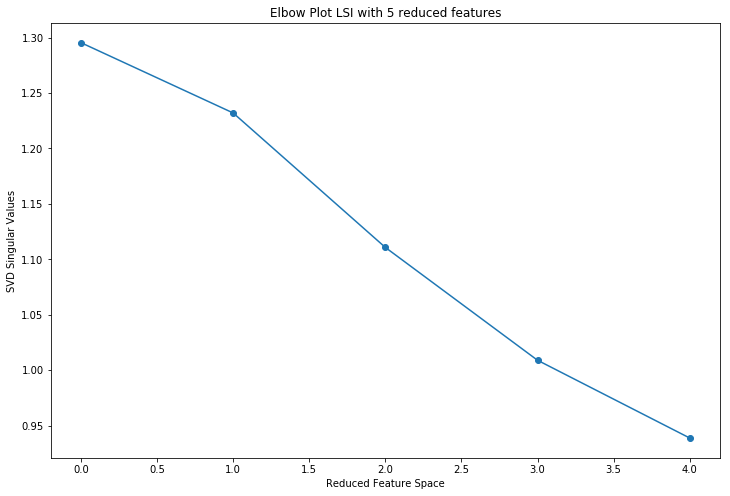

In [87]:
plt.figure(figsize=(12, 8))
plt.plot(range(0,5), list(tfidf_svd_v2.singular_values_), marker='o')
plt.xlabel('Reduced Feature Space')
plt.ylabel('SVD Singular Values')
plt.title('Elbow Plot LSI with 5 reduced features')

In [104]:
lsi = models.LsiModel(tfidf_corpus, id2word=id2word, num_topics=5)

In [105]:
lsi_corpus = lsi[tfidf_corpus]

In [106]:
lsi_corpus

In [107]:
doc_vecs = [doc for doc in lsi_corpus]
doc_vecs[0]


[(0, 0.22386371438709585),
 (1, -0.3913233455354807),
 (2, 0.4293849162167189),
 (3, -0.09250709880867758),
 (4, -0.7323674688019345)]

In [108]:
len(doc_vecs)

9

In [109]:
# Convert the gensim-style corpus vecs to a numpy array for sklearn manipulations
ng_lsi = matutils.corpus2dense(lsi_corpus, num_terms=5).transpose()
ng_lsi.shape

(9, 5)

In [110]:
ng_lsi

array([[ 0.22386372, -0.39132336,  0.42938492, -0.0925071 , -0.73236746],
       [ 0.56712204, -0.45359084, -0.4282852 , -0.00774564, -0.16904266],
       [ 0.30151686, -0.5205477 ,  0.3628491 ,  0.05890948,  0.3106592 ],
       [ 0.15087423, -0.34254062,  0.63332695, -0.06715222,  0.37409714],
       [ 0.37828502, -0.46538043, -0.5048881 ,  0.25509903,  0.2114937 ],
       [ 0.19084777,  0.21611145,  0.16265589,  0.8521987 , -0.15314011],
       [ 0.47583884,  0.42738768,  0.1682844 ,  0.20367129,  0.06786852],
       [ 0.57747304,  0.4775495 ,  0.13049899, -0.13396455,  0.07965775],
       [ 0.6731288 ,  0.31070036, -0.07974461, -0.38807303, -0.02876925]],
      dtype=float32)